<a href="https://colab.research.google.com/github/Tejas-TA/Neural-Network-Movie-Recommendation-/blob/main/Neural_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Collaborative filter based Movie Recommendation System**
---
This is a movie recommendation project. The dataset is from movielens dataset extract which contains ~100K records. The recommendation of a movie is based on the **Neural Collaborative** filtering technique.

## Data Preprocessing

Including Data Analysis, Visualization and Manipulation

In [1]:
#Importing necessary libraries at once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
import tensorflow as tf

In [2]:
#Importing dataset and assigning names to features
titles = ['movie_ratings','movie_ids','user_ids','Timestamp']
df = pd.read_csv('/content/drive/MyDrive/Recommendation System/data.csv', names = titles)
df.head(15)

,movie_ratings,movie_ids,user_ids,Timestamp
0,3,242,196,881250949
1,3,302,186,891717742
2,1,377,22,878887116
3,2,51,244,880606923
4,1,346,166,886397596
5,4,474,298,884182806
6,2,265,115,881171488
7,5,465,253,891628467
8,3,451,305,886324817
9,3,86,6,883603013


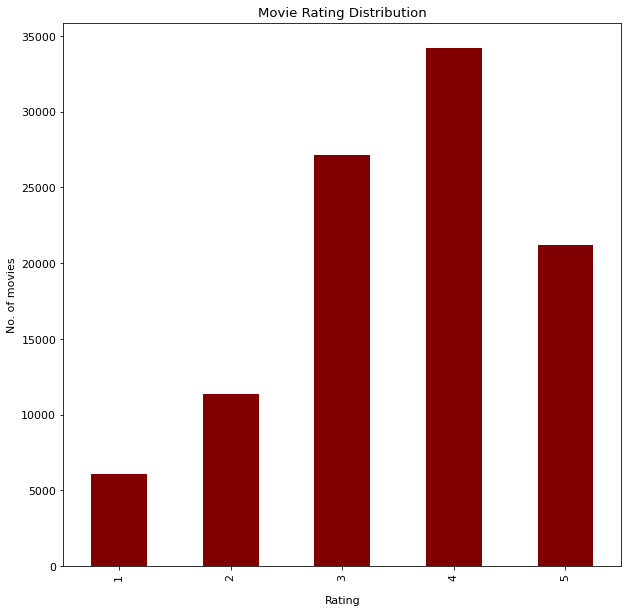

In [3]:
#Plotting ratings chart
plt.figure(figsize=(10,10)) 
plt.rc("font", size=11)
df.movie_ratings.value_counts(sort=False).plot(kind='bar', color ='maroon')
plt.title('Movie Rating Distribution')
plt.xlabel('\nRating')
plt.ylabel('No. of movies')
plt.show()

In [4]:
#Extracting column names
column_names = list(df.columns.values)
column_names

['movie_ratings', 'movie_ids', 'user_ids', 'Timestamp']

In [5]:
#Re-ordering columns
df = df[['user_ids', 'movie_ids', 'movie_ratings','Timestamp']]
df.head(15)

,user_ids,movie_ids,movie_ratings,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [6]:
#Dataset has ~100k records
df.tail(10)

,user_ids,movie_ids,movie_ratings,Timestamp
99990,806,421,4,882388897
99991,676,538,4,892685437
99992,721,262,3,877137285
99993,913,209,2,881367150
99994,378,78,3,880056976
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


## Neural Network Building

In [7]:
#Splitting the dataset into train and test 
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [8]:
n_users = len(df.user_ids.unique())
n_users

943

In [9]:
n_items = len(df.movie_ids.unique())
n_items

1682

In [10]:
#Creating movie embedding path
movie_input = Input(shape = [1], name = "Movie-Input")
movie_embedding = Embedding(n_items + 1, 5, name= "Movie-Embedding")(movie_input)
movie_vec = Flatten(name = "Flatten-Movies")(movie_embedding)

#Creating user embedding path
user_input = Input(shape = [1], name = "User-Input")
user_embedding = Embedding(n_users + 1, 5, name = "User-Embedding")(user_input)
user_vec = Flatten(name = "Flatten-Users")(user_embedding)

#Concatenate features
conc = Concatenate()([movie_vec, user_vec])

#Weight Initialization
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1., seed = None)

#Add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(100, activation='relu')(fc1)
fc3 = Dense(80, activation='relu')(fc2)
fc4 = Dense(60, activation='relu')(fc3)
fc5 = Dense(32, activation='relu')(fc4)
out = Dense(1)(fc5)

#Create model and compile it
model = Model([user_input, movie_input], out)
model.compile('adam', 'mean_squared_error')

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie-Input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         8415        Movie-Input[0][0]                
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         4720        User-Input[0][0]                 
______________________________________________________________________________________________

In [12]:
history = model.fit([train.user_ids, train.movie_ids], train.movie_ratings, epochs = 18, verbose = 1)

Epoch 1/18
2344/2344 [==============================] - 20s 3ms/step - loss: 1.6062
Epoch 2/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.8927
Epoch 3/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.8538
Epoch 4/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.8277
Epoch 5/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.7902
Epoch 6/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.7529
Epoch 7/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.7246
Epoch 8/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.7077
Epoch 9/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6888
Epoch 10/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6831
Epoch 11/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6623
Epoch 12/18
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6589


In [13]:
model.evaluate([test.user_ids, test.movie_ids], test.movie_ratings)

782/782 [==============================] - 2s 2ms/step - loss: 0.9274


0.9273605346679688

## Movie Rating Prediction

In [14]:
#Predicting ratings
predictions = model.predict([test.user_ids.head(10), test.movie_ids.head(10)])
[print(predictions[i], test.movie_ratings.iloc[i]) for i in range(0,10)]

[3.7645354] 4
[3.7596421] 3
[3.5160546] 4
[2.0176213] 2
[4.0441256] 2
[3.4688585] 3
[4.1284647] 5
[4.216727] 4
[3.4606106] 3
[2.9891217] 4


[None, None, None, None, None, None, None, None, None, None]

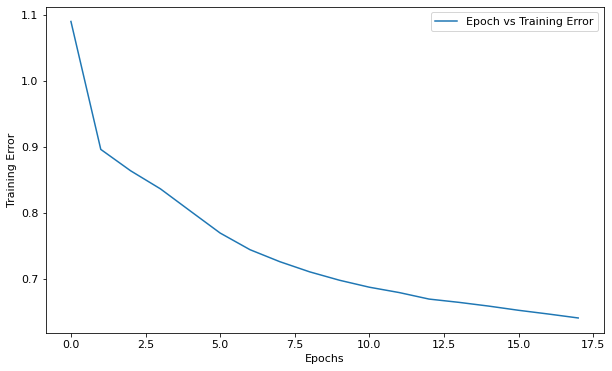

In [15]:
#Plotting loss function against epochs, as epochs increased error decreases
plt.figure(figsize=(10,6)) 
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.legend(["Epoch vs Training Error"])
plt.show()

In [16]:
#Show the best validation RMSE
import math
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['loss']))
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 18 = 0.8002


In [17]:
#Run this to save the model. 
#Note: Consumes lot of drive space
#model2.save('Recommendation_Model_Neural_Network.h5')

## Embeddings Visualization

In [18]:
item_em = model.get_layer('Movie-Embedding')
item_em_weights = item_em.get_weights()[0]

In [19]:
item_em_weights[:5]

array([[ 0.02110325, -0.00528955, -0.02910987, -0.01247922,  0.02127017],
       [-0.01775989, -0.359468  , -0.16436082, -0.2660597 , -0.15996885],
       [-0.12550692, -0.21725251, -0.04070576, -0.16161682,  0.08622047],
       [ 0.02602149,  0.14989322,  0.12241415,  0.10182509, -0.03654853],
       [ 0.07379519,  0.0327619 , -0.06232721, -0.07644718, -0.13666295]],
      dtype=float32)

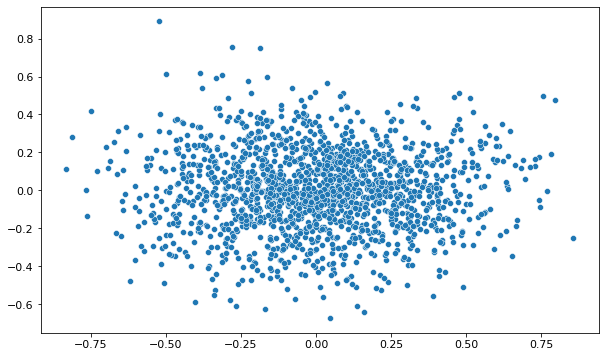

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

plt.figure(figsize=(10,6)) 

pca = PCA(n_components=2)
pca_result = pca.fit_transform(item_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [21]:
item_em_weights = item_em_weights / np.linalg.norm(item_em_weights, axis = 1).reshape((-1, 1))
item_em_weights[0][:10]
np.sum(np.square(item_em_weights[0]))

1.0000001

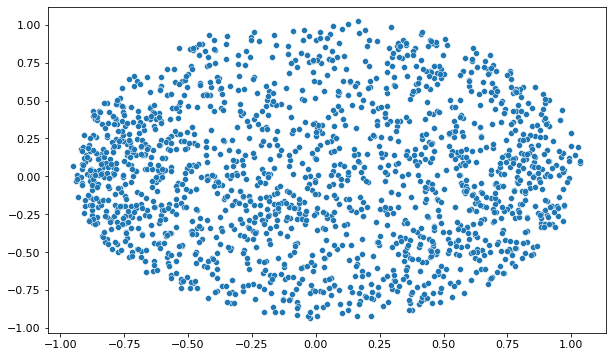

In [22]:
plt.figure(figsize=(10,6)) 

pca = PCA(n_components=2)
pca_result = pca.fit_transform(item_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

## Suggesting recommendations

In [23]:
# Creating dataset for making recommendations for the first user
item_data = np.array(list(set(df.movie_ids)))
item_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
user = np.array([1 for i in range(len(item_data))])
user[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
predictions = model.predict([user, item_data])

predictions = np.array([a[0] for a in predictions])

recommended_movie_ids = (-predictions).argsort()[:10]

recommended_movie_ids

array([1174,  542, 1466, 1462, 1404, 1387, 1499, 1448, 1628, 1343])

In [26]:
movies = pd.read_csv('/content/drive/MyDrive/Recommendation System/movies.csv', encoding='ISO-8859-1')
movies.head()

,movie_id,movie_title,year_of_release,genre
0,1,Toy Story,1995.0,Animation|Children's|Comedy
1,2,Jumanji,1995.0,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,1995.0,Comedy|Romance
3,4,Waiting to Exhale,1995.0,Comedy|Drama
4,5,Father of the Bride Part II,1995.0,Comedy


In [27]:
movies[movies['movie_id'].isin(recommended_movie_ids)]

,movie_id,movie_title,year_of_release,genre
537,542,Son in Law,NaN,Comedy
1157,1174,Grosse Fatigue,NaN,Comedy
1321,1343,Cape Fear,NaN,Thriller
1365,1387,Jaws,NaN,Action|Horror
1380,1404,Night Falls on Manhattan,NaN,Crime|Drama
1422,1448,Fire on the Mountain,NaN,Documentary
1434,1462,Unforgotten: Twenty-Five Years After Willowbrook,NaN,Documentary
1438,1466,Donnie Brasco,NaN,Crime|Drama
1466,1499,Anaconda,NaN,Action|Adventure|Thriller
1584,1628,Locusts,NaN,NaN
